In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the datasets
# Assuming the datasets are in the same Excel file
data_file = "Assignment.xlsx"
user_details = pd.read_excel(data_file, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(data_file, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(data_file, sheet_name="OrderDetails.csv")

In [3]:
# Step 2: Data Cleaning
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [4]:
# Fill or drop missing values
user_details.fillna(method='ffill', inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.fillna(method='bfill', inplace=True)

In [5]:
# Step 3: Merge the datasets
# Ensure there's a common key between the datasets (e.g., user_id)
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
merged_data = pd.merge(merged_data, order_details, on='User ID', how='inner')

# Print the columns of the merged dataframe to check if 'Session ID' is present
print(merged_data.columns) 

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID_x', 'Dish Name_x',
       'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'Session ID_y'],
      dtype='object')


In [6]:
# Step 4: Analyze relationships between cooking sessions and orders
# If 'Session ID' is present, the following code should work:
if 'Session ID_x' in merged_data.columns:
    cooking_order_analysis = merged_data.groupby('Session ID_x')['Order ID'].count()
    print(cooking_order_analysis.describe())
else:
    print("Column 'Session ID' not found in merged_data. Check your data and merging process.")

count    16.000000
mean      2.375000
std       0.806226
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: Order ID, dtype: float64


In [7]:
# Step 5: Identify popular dishes
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)
print("Top 10 Popular Dishes:\n", popular_dishes)


Top 10 Popular Dishes:
 Dish Name_x
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64


In [8]:
# Step 6: Explore demographic factors
age_group_analysis = merged_data.groupby('Age')['Order ID'].count()
location_analysis = merged_data.groupby('Location')['Order ID'].count()


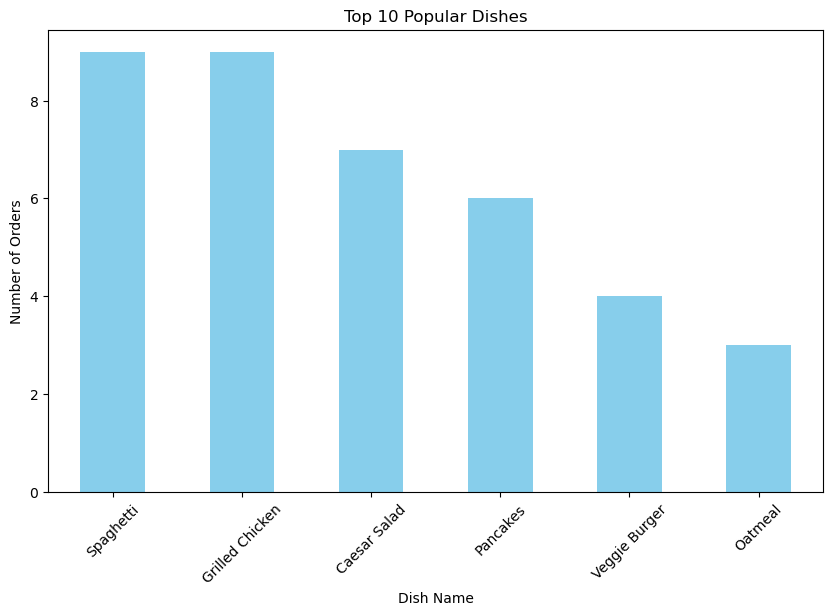

In [9]:
# Step 7: Visualizations
# Popular Dishes
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

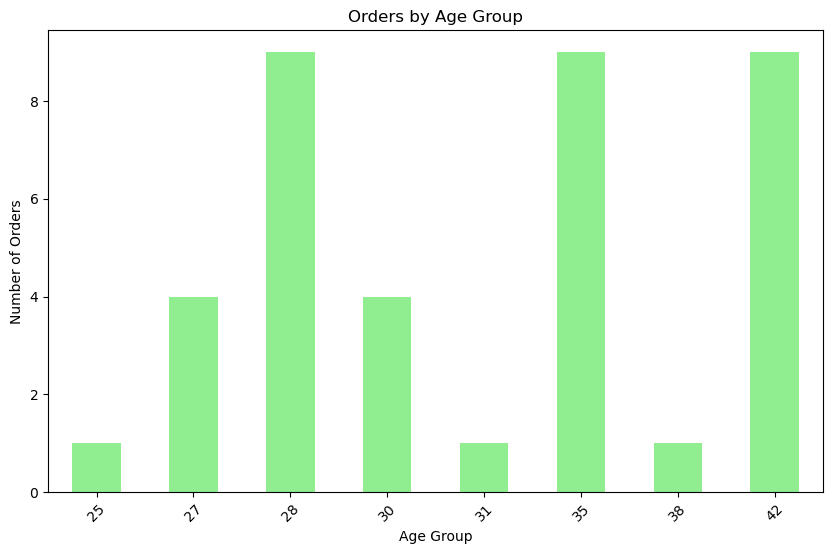

In [10]:
# Age Group Analysis
plt.figure(figsize=(10, 6))
age_group_analysis.plot(kind='bar', color='lightgreen')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

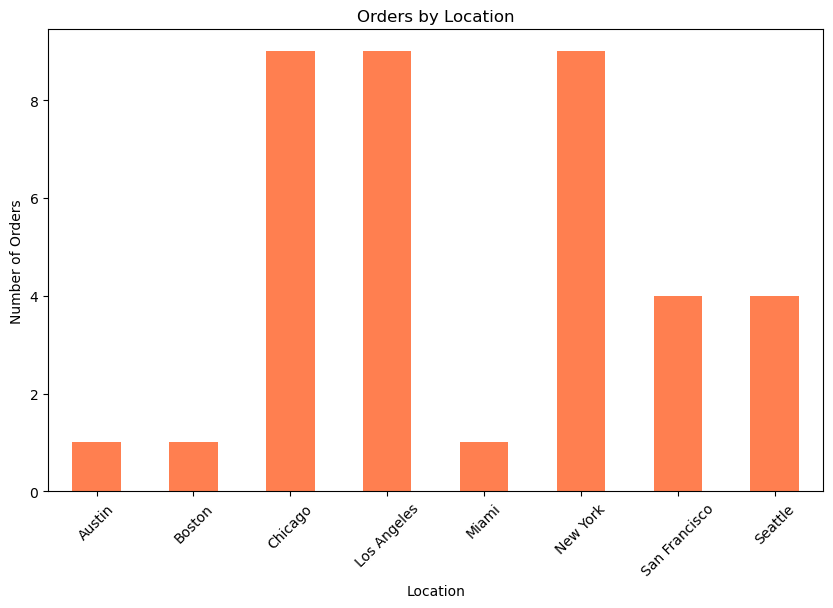

In [11]:
# Location Analysis
plt.figure(figsize=(10, 6))
location_analysis.plot(kind='bar', color='coral')
plt.title('Orders by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
